### Importando as Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#configuração válida somente para notebooks
%matplotlib inline

#configuração para compatibilizações entre o pandas e o matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Criando dados para futuras plotagens

In [2]:
cossenos = np.cos(np.linspace(0,5,50))
arcos_tangentes = np.arctan(np.linspace(0,5,50))
senos = np.sin(np.linspace(0,5,50))
distribuicao_normal = np.random.randn(1000)
ibovespa_historico = pd.read_csv("BVSP.csv",sep=',')

### Plotagens Básicas

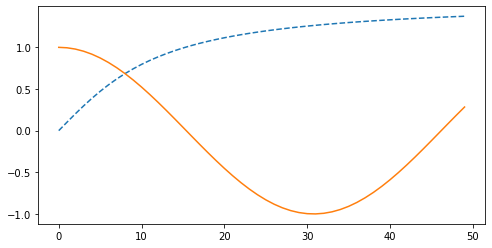

In [3]:
#Note que o parâmetro figsize controla o tamanho da figura
fig = plt.figure(figsize=(8,4))

#plot se comporta como um gráfico de linhas quando utilizado com apenas um conjunto de dados
plt.plot(arcos_tangentes,'--')
#o ';' no final da última linha de plotagens avisa ao jupyter pra tirar os nomes dos objetos retornados na plotagem
plt.plot(cossenos,'-');

### Plotagens Básicas em subplots

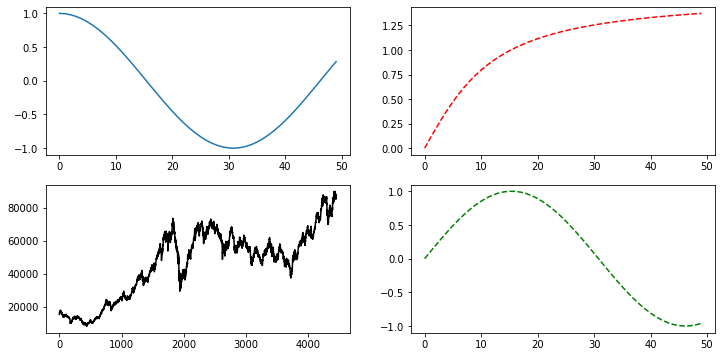

In [4]:
fig  = plt.figure(figsize=(12,6))

#Crio o primeiro subplot em um frame determinado por 2 linhas e 2 colunas
#coloco esse plot no painel 1 (terceiro argumento passado)
plt.subplot(2,2,1) 

#faço o plot de fato
plt.plot(cossenos,'-')

#Crio o segundo subplot no mesmo frame de 2 linhas e 2 colunas
#dessa vez, coloco o plot no painel 2
plt.subplot(2,2,2)

#Faço o segundo plot
#o parâmetro color pode ser setado diretamente no método plot
plt.plot(arcos_tangentes,'--',color='red')

#e asssim por diante...
plt.subplot(2,2,3)
plt.plot(ibovespa_historico['Close'],'-',color='black')

plt.subplot(2,2,4)
plt.plot(senos,'--',color='green');

### Ajuste nos limites dos eixos e na legenda

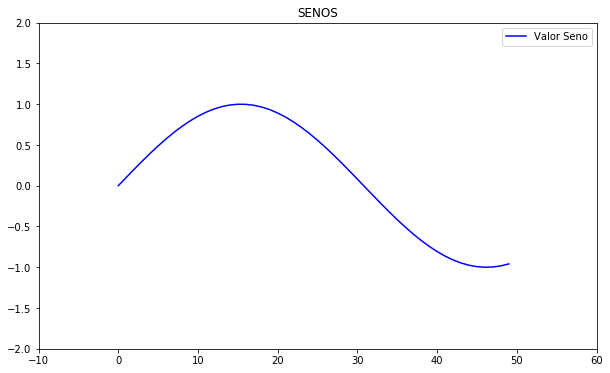

In [5]:
fig = plt.figure(figsize=(10,6))

#Aqui vemos um novo parâmetro 'label' que dá um rótulo ao gráfico (só é mostrado com o método legend)
plt.plot(senos,'-',color='blue',label='Valor Seno')

#Aqui podemos alterar os limites do gráfico em ambos os eixos x e y
plt.xlim(-10,60)
plt.ylim(-2,2)

#Aqui mostramos os rótulos criados anteriormente
plt.legend()

#Aqui dou um título ao meu gráfico
plt.title("SENOS");

### Criando gráficos de dispersão (Scatter Plot)

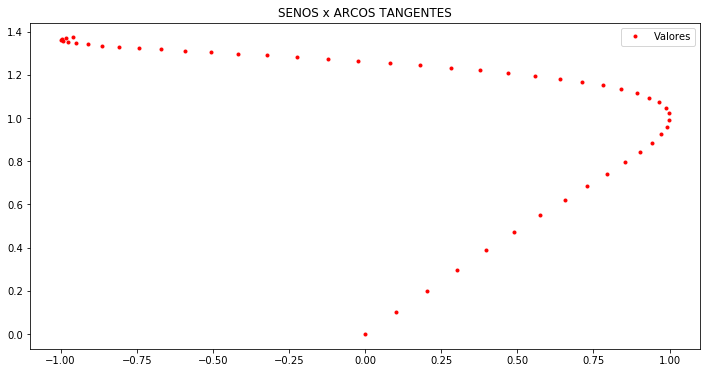

In [6]:
fig = plt.figure(figsize=(12,6))

#Quando eu coloco dois conjuntos de dados no método plot ele desenha um gráfico de dispersão
#Gráficos de dispersão convencionalmente devem sempre ser marcados por pontos '.'
plt.plot(senos,arcos_tangentes,'.',color='red',label='Valores')

plt.legend()
plt.title("SENOS x ARCOS TANGENTES");

### Criando Gráficos de Frequência (Histogramas)

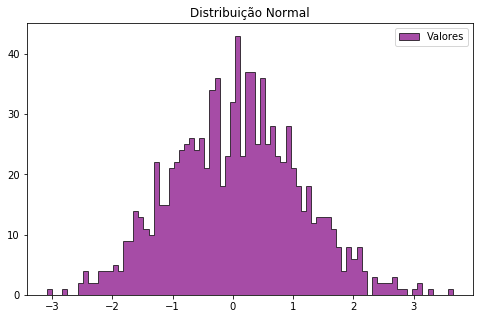

In [7]:
fig = plt.figure(figsize=(8,5))
plt.hist(distribuicao_normal,bins=80,alpha=0.7,histtype='stepfilled',color='purple',edgecolor='black',label='Valores')
plt.legend()
plt.title('Distribuição Normal');

### Configurando subplots de outra forma

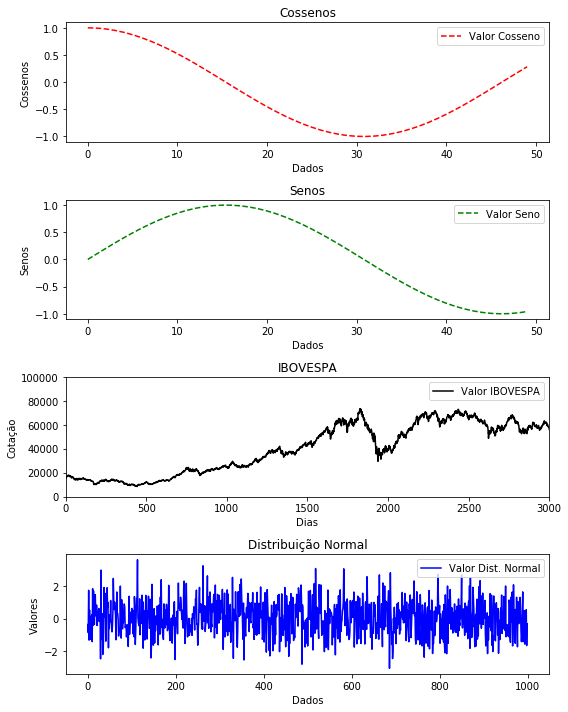

In [8]:
#Crio uma lista de 4 subplots em uma figura de tamanho figsize
fig , subplots = plt.subplots(4,figsize=(8,10))

#Ploto cada gráfico em seu respectivo subplot
#Configuro atributos de cada subplot
subplots[0].plot(cossenos,'--',color='red',label='Valor Cosseno')
subplots[0].set(title='Cossenos',xlabel='Dados',ylabel='Cossenos')

subplots[1].plot(senos,'--',color='green',label='Valor Seno')
subplots[1].set(title='Senos',xlabel='Dados',ylabel='Senos',label='Valor Seno')

subplots[2].plot(ibovespa_historico['Close'],'-',color='black')
subplots[2].set(xlim=(0,3000),ylim=(0,100000),xlabel='Dias',ylabel='Cotação',title='IBOVESPA')

subplots[3].plot(distribuicao_normal,'-',color='blue')
subplots[3].set(title='Distribuição Normal',xlabel='Dados',ylabel='Valores')

#Adiciono um espaçamento na figura para que não haja sobreposição de gráficos
fig.tight_layout()

#Adiciono a legenda de cada subplot feito
#Observe que no subplot 0 eu adicionei a label na plotagem, no subplot 1 eu adicionei a label no método set e nos demais
#subplots (2 e 3) eu adicionei a label diretamente no método legend
subplots[0].legend()
subplots[1].legend()
subplots[2].legend(['Valor IBOVESPA'])
subplots[3].legend(['Valor Dist. Normal']);


### Formatando as legendas

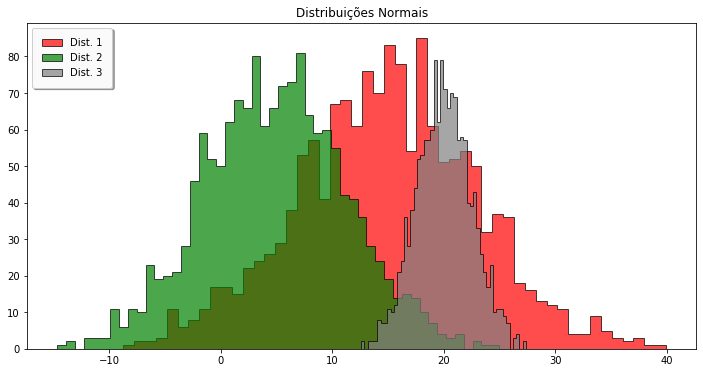

In [9]:
#Crio 3 distribuições normais para plotar
dn1 = np.random.normal(15,8.5,1500)
dn2 = np.random.normal(5,6.5,1500)
dn3 = np.random.normal(20,2.5,1500)

#crio um dicionário de configurações para os plots (bastante útil)
config = {'histtype':'stepfilled','bins':50,'edgecolor':'black','alpha':0.7}

fig = plt.figure(figsize=(12,6))

#Faço as plotagens estourando o dicionário de configurações
plt.hist(dn1,**config,color='red',label='Dist. 1')
plt.hist(dn2,**config,color='green',label='Dist. 2')
plt.hist(dn3,**config,color='gray',label='Dist. 3')

#Adiciono as legendas passando configurações especiais pra elas
plt.legend(loc='upper left',frameon=True,ncol=1,fancybox=True,framealpha=0.95,shadow=True,borderpad=1)

plt.title("Distribuições Normais");

### Adicionando contextos de plotagem aos gráficos

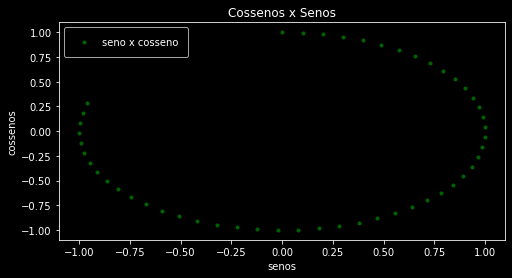

In [10]:
#poderia usa a linha abaixo para ver os contextos de plotagem disponíveis
plt.style.available

#uso o statement with para inserir o contexto de plotagem
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(8,4))
    plt.plot(senos,cossenos,'.',color='darkgreen',label='seno x cosseno')
    plt.xlabel('senos')
    plt.ylabel('cossenos')
    plt.legend(loc='upper left',shadow=True,fancybox=True,frameon=True,ncol=1,framealpha=0.8,borderpad=1)
    plt.title('Cossenos x Senos');

### Transformo as datas do meu dataframe de strings para Timestamps (O matplotlib não trabalha bem com strings)

In [11]:
from datetime import datetime
ibovespa_historico['Data'] = ibovespa_historico['Data'].apply(lambda x : datetime.strptime(x,'%m/%d/%Y'))

In [12]:
type(ibovespa_historico['Data'][0])

pandas._libs.tslibs.timestamps.Timestamp

### Adicionando Textos e Anotações aos gráficos

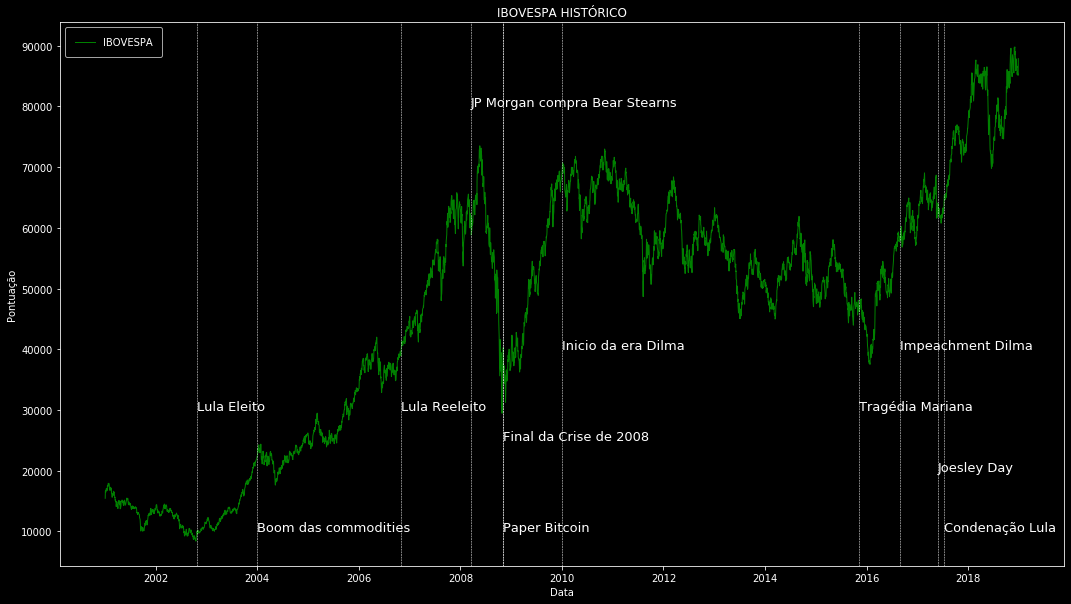

In [13]:
#Crio o gráfico com seu devido contexto de plotagem
with plt.style.context('dark_background'):
    fig = plt.figure(figsize=(18,10))
    plt.plot(ibovespa_historico['Data'],ibovespa_historico['Close'],color='green',linewidth=1,label='IBOVESPA')
    plt.xlabel("Data")
    plt.ylabel("Pontuação")
    plt.legend(loc='upper left',shadow=True,framealpha=0.8,fancybox=True,frameon=True,borderpad=1,ncol=1)
    plt.title("IBOVESPA HISTÓRICO")
 
#Uso dicionários novamente para criar configurações
setup_texts = dict(size = 13, color = "white")
setup_lines = dict(color = "white", linestyle = "--", linewidth = 0.5)

#Crio todas as minhas anotações e linhas verticais no gráfico
plt.text("2004-01-01", 10000, "Boom das commodities",**setup_texts)
plt.axvline("2004-01-01",**setup_lines)

plt.text("2008-03-16", 80000, "JP Morgan compra Bear Stearns",**setup_texts)
plt.axvline("2008-03-16",**setup_lines)

plt.text("2008-11-01", 25000, "Final da Crise de 2008",**setup_texts)
plt.axvline("2008-11-01",**setup_lines)

plt.text("2010-01-01", 40000, "Inicio da era Dilma",**setup_texts)
plt.axvline("2010-01-01",**setup_lines)

plt.text("2016-08-31", 40000, "Impeachment Dilma",**setup_texts)
plt.axvline("2016-08-31",**setup_lines)

plt.text("2015-11-05", 30000, "Tragédia Mariana",**setup_texts)
plt.axvline("2015-11-05",**setup_lines)

plt.text("2017-05-27", 20000, "Joesley Day",**setup_texts)
plt.axvline("2017-05-27",**setup_lines)

plt.text("2017-07-12", 10000, "Condenação Lula",**setup_texts)
plt.axvline("2017-07-12",**setup_lines)

plt.text("2008-10-31", 10000, "Paper Bitcoin",**setup_texts)
plt.axvline("2008-10-31",**setup_lines)

plt.text("2002-10-27", 30000, "Lula Eleito",**setup_texts)
plt.axvline("2002-10-27",**setup_lines)

plt.text("2006-10-29", 30000, "Lula Reeleito",**setup_texts)
plt.axvline("2006-10-29",**setup_lines)

plt.savefig("IBOV_histórico_aula_visualização_dados.png");